In [1]:
import pandas as pd

In [14]:
df=pd.read_csv(r'D:\Documents\GitHub\My own labs\mlcourse.ai\data\telecom_churn.csv')

In [15]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 20)

In [16]:
df.drop('State',axis=1,inplace=True)

In [17]:
df['International plan']=df['International plan'].map({'No':0,'Yes':1})
df['Voice mail plan']=df['Voice mail plan'].map({'No':0,'Yes':1})

In [18]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),
                                              df.Churn, test_size=1/3, random_state=11)

In [23]:
y_test.shape

(1111,)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn.metrics import auc,confusion_matrix

In [31]:
model1=LogisticRegression()
res1=model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
pd.DataFrame(pred1).head()

,0
0,False
1,False
2,False
3,False
4,False


In [33]:
conf1=confusion_matrix(y_test,pred1)
conf1

array([[932,  20],
       [136,  23]], dtype=int64)

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

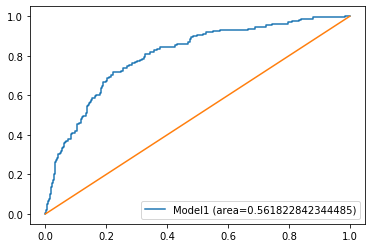

In [39]:
import matplotlib.pyplot as plt
model1_roc=roc_auc_score(y_test,pred1)
fpr,tpr,thresholds=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model1 (area={model1_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [40]:
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [41]:
?LogisticRegression

In [42]:
model1=LogisticRegression(class_weight='balanced')
res1=model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
conf1=confusion_matrix(y_test,pred1)
conf1

array([[746, 206],
       [ 44, 115]], dtype=int64)

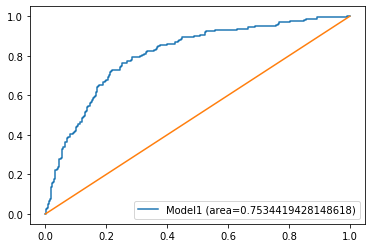

In [44]:
import matplotlib.pyplot as plt
model1_roc=roc_auc_score(y_test,pred1)
fpr,tpr,thresholds=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model1 (area={model1_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [50]:
model2=KNeighborsClassifier(n_neighbors=7,weights='distance')
res2=model2.fit(X_train,y_train)
pred2=model2.predict(X_test)

In [51]:
conf2=confusion_matrix(y_test,pred2)
conf2

array([[937,  15],
       [122,  37]], dtype=int64)

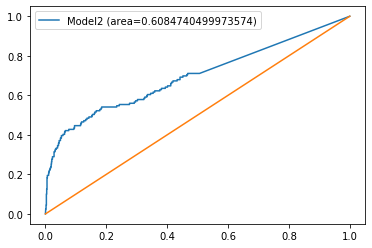

In [52]:
import matplotlib.pyplot as plt
model2_roc=roc_auc_score(y_test,pred2)
fpr,tpr,thresholds=roc_curve(y_test, model2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model2 (area={model2_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [54]:
model3=GaussianNB()
res3=model3.fit(X_train,y_train)
pred3=model3.predict(X_test)

In [55]:
conf3=confusion_matrix(y_test,pred3)
conf3

array([[885,  67],
       [ 83,  76]], dtype=int64)

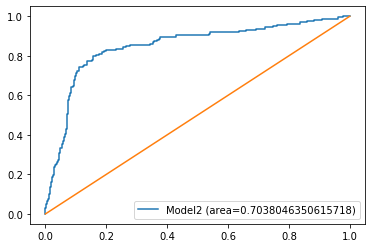

In [56]:
import matplotlib.pyplot as plt
model3_roc=roc_auc_score(y_test,pred3)
fpr,tpr,thresholds=roc_curve(y_test, model3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model2 (area={model3_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [66]:
model4=DecisionTreeClassifier(class_weight='balanced')
res4=model4.fit(X_train,y_train)
pred4=model4.predict(X_test)

In [67]:
conf4=confusion_matrix(y_test,pred4)
conf4

array([[916,  36],
       [ 46, 113]], dtype=int64)

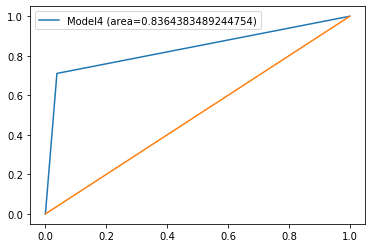

In [68]:
import matplotlib.pyplot as plt
model4_roc=roc_auc_score(y_test,pred4)
fpr,tpr,thresholds=roc_curve(y_test, model4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model4 (area={model4_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [74]:
model5=RandomForestClassifier(class_weight='balanced')
res5=model5.fit(X_train,y_train)
pred5=model5.predict(X_test)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
conf5=confusion_matrix(y_test,pred5)
conf5

array([[948,   4],
       [ 71,  88]], dtype=int64)

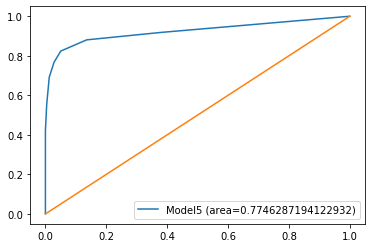

In [76]:
import matplotlib.pyplot as plt
model5_roc=roc_auc_score(y_test,pred5)
fpr,tpr,thresholds=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model5 (area={model5_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [81]:
model6=SVC(probability=True)
res6=model6.fit(X_train,y_train)
pred6=model6.predict(X_test)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
conf6=confusion_matrix(y_test,pred6)
conf6

array([[952,   0],
       [159,   0]], dtype=int64)

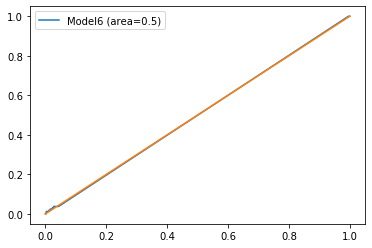

In [83]:
import matplotlib.pyplot as plt
model6_roc=roc_auc_score(y_test,pred6)
fpr,tpr,thresholds=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model6 (area={model6_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [112]:
from sklearn.svm import NuSVC
model7=NuSVC(nu=0.2,probability=True, gamma='scale')
res7=model7.fit(X_train,y_train)
pred7=model7.predict(X_test)

In [113]:
conf7=confusion_matrix(y_test,pred7)
conf7

array([[872,  80],
       [ 73,  86]], dtype=int64)

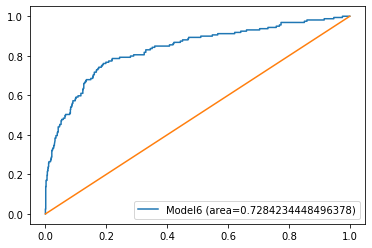

In [114]:
import matplotlib.pyplot as plt
model7_roc=roc_auc_score(y_test,pred7)
fpr,tpr,thresholds=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model6 (area={model7_roc})')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [120]:
accuracy_score(y_test, pred7)

0.8622862286228623

In [121]:
recall_score(y_test, pred7)

0.5408805031446541

In [122]:
precision_score(y_test, pred7)

0.5180722891566265

In [123]:
f1_score(y_test, pred7)

0.5292307692307692

In [127]:
print(precision_score(y_test,pred1))
print(recall_score(y_test,pred1))

0.3582554517133956
0.7232704402515723


In [125]:
print(f1_score(y_test, pred1))
print(f1_score(y_test, pred2))
print(f1_score(y_test, pred3))
print(f1_score(y_test, pred4))
print(f1_score(y_test, pred5))
print(f1_score(y_test, pred6))

0.4791666666666666
0.35071090047393366
0.5033112582781457
0.7337662337662337
0.7011952191235059
0.0
